In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2021-02-09 09:52:36 +05:30)


In [2]:
#Preprocessing
#(1)Resize
#(2)Flattening

#Alternative for reading image is opencv
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize #beacuse image should be in specific size

target= []
images= []
flat_data= []

DATADIR=r'C:\Users\SANJAY\Desktop\Weather classification\images'
CATEGORIES=['cloudy','rainy','shiny','sunrise']

for category in CATEGORIES:
  class_num=CATEGORIES.index(category) #Label Encoding the values
  path=os.path.join(DATADIR,category) #create path to use all the images
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized=resize(img_array,(150,150,3)) #Normalize the value from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)    


time: 2min 36s (started: 2021-02-09 09:52:55 +05:30)


In [7]:
flat_data

array([[0.5       , 0.5       , 0.5       , ..., 0.21143791, 0.21143791,
        0.21143791],
       [0.67786248, 0.73668601, 0.85825464, ..., 0.44313725, 0.56078431,
        0.6627451 ],
       [0.53155573, 0.53462763, 0.56871878, ..., 0.34857499, 0.29367303,
        0.15392139],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.43137255, 0.14117647, 0.03921569, ..., 0.16862745, 0.09639216,
        0.05868078],
       [0.57218301, 0.27806536, 0.12512418, ..., 0.23137255, 0.12375163,
        0.08061438]])

time: 15 ms (started: 2021-02-08 18:17:05 +05:30)


In [8]:
  flat_data[0]

array([0.5       , 0.5       , 0.5       , ..., 0.21143791, 0.21143791,
       0.21143791])

time: 0 ns (started: 2021-02-08 18:17:07 +05:30)


In [9]:
target

array([0, 0, 0, ..., 3, 3, 3])

time: 31 ms (started: 2021-02-08 18:17:11 +05:30)


<BarContainer object of 4 artists>

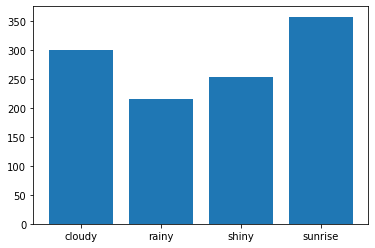

time: 859 ms (started: 2021-02-09 09:55:53 +05:30)


In [3]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [4]:
np.unique(target,return_counts=True)

(array([0, 1, 2, 3]), array([300, 215, 253, 357], dtype=int64))

time: 15 ms (started: 2021-02-09 09:55:57 +05:30)


In [5]:
#Split data into training & Testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=109)

time: 625 ms (started: 2021-02-09 09:55:59 +05:30)


In [7]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

time: 13.8 s (started: 2021-02-09 09:56:13 +05:30)


In [9]:
y_pred1=classifier.predict(x_test)

time: 203 ms (started: 2021-02-09 09:56:34 +05:30)


In [11]:
### Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred1)

time: 16 ms (started: 2021-02-09 09:56:58 +05:30)


In [12]:
score

0.8254437869822485

time: 0 ns (started: 2021-02-09 09:57:05 +05:30)


In [13]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

time: 16 ms (started: 2021-02-09 09:57:37 +05:30)


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm 
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 2h 45min 45s (started: 2021-02-08 18:17:31 +05:30)


In [14]:
y_pred=clf.predict(x_test)
y_pred

array([2, 2, 1, 3, 0, 2, 3, 1, 3, 1, 1, 3, 1, 0, 1, 1, 1, 2, 2, 3, 3, 1,
       3, 2, 1, 2, 0, 2, 3, 0, 2, 0, 0, 1, 2, 3, 2, 2, 0, 0, 3, 0, 0, 1,
       3, 0, 3, 1, 0, 0, 1, 2, 0, 3, 3, 1, 1, 3, 2, 2, 3, 2, 3, 3, 3, 1,
       2, 1, 0, 0, 2, 3, 2, 1, 3, 3, 2, 3, 2, 2, 0, 2, 0, 3, 3, 3, 1, 2,
       3, 2, 3, 3, 2, 3, 2, 0, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 0, 0, 0,
       1, 2, 1, 1, 1, 3, 3, 3, 0, 0, 0, 0, 0, 3, 0, 1, 2, 0, 3, 3, 3, 2,
       0, 3, 3, 3, 3, 0, 0, 0, 2, 3, 1, 0, 2, 2, 3, 0, 3, 3, 1, 2, 2, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 0, 3, 3, 2, 0, 0, 0, 1, 0, 3,
       3, 1, 3, 3, 2, 2, 3, 3, 3, 3, 3, 1, 3, 0, 1, 3, 3, 1, 3, 2, 2, 1,
       2, 0, 3, 3, 3, 2, 0, 3, 3, 2, 0, 3, 0, 2, 0, 2, 0, 0, 1, 3, 1, 3,
       3, 3, 3, 0, 0, 2, 2, 1, 1, 0, 3, 2, 3, 0, 0, 1, 0, 1, 3, 1, 0, 0,
       0, 3, 2, 3, 3, 0, 2, 1, 2, 2, 3, 2, 2, 1, 3, 3, 0, 3, 2, 1, 1, 2,
       3, 1, 2, 3, 2, 3, 2, 3, 2, 2, 1, 1, 3, 0, 0, 0, 2, 3, 0, 1, 2, 3,
       3, 3, 3, 3, 3, 0, 2, 3, 1, 3, 0, 1, 3, 3, 3,

time: 16.9 s (started: 2021-02-08 21:12:31 +05:30)


In [15]:
from sklearn.metrics import accuracy_score , confusion_matrix

time: 0 ns (started: 2021-02-08 21:12:52 +05:30)


In [16]:
accuracy_score(y_pred,y_test)

0.8461538461538461

time: 15 ms (started: 2021-02-08 21:12:58 +05:30)


In [17]:
confusion_matrix(y_pred,y_test)

array([[ 60,  15,   5,   3],
       [ 12,  45,   1,   1],
       [  7,   3,  66,   1],
       [  0,   0,   4, 115]], dtype=int64)

time: 62 ms (started: 2021-02-08 21:13:03 +05:30)


In [18]:
#save the model using pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 2.97 s (started: 2021-02-08 21:13:13 +05:30)


In [19]:
model=pickle.load(open('img_model.p','rb'))

time: 234 ms (started: 2021-02-08 21:13:42 +05:30)


Enter Your URLhttps://www.teahub.io/photos/full/20-201139_full-hd-p-sunrise-wallpapers-hd-desktop-backgrounds.jpg
(1080, 1920, 3)
PREDICTED OUTPUT: sunrise


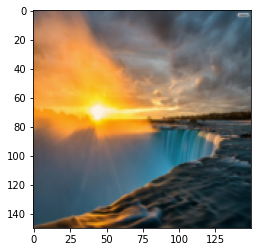

time: 9.31 s (started: 2021-02-08 21:14:30 +05:30)


In [20]:
#Testing a complete new image
flat_data=[]
url=input('Enter Your URL')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data =np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')

In [21]:
!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok

  Using cached streamlit-0.76.0-py2.py3-none-any.whl (7.5 MB)
  Using cached blinker-1.4.tar.gz (111 kB)
  Using cached tzlocal-2.1-py2.py3-none-any.whl (16 kB)
  Using cached base58-2.1.0-py3-none-any.whl (5.6 kB)
  Using cached validators-0.18.2-py3-none-any.whl (19 kB)
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached altair-4.1.0-py3-none-any.whl (727 kB)
  Using cached GitPython-3.1.12-py3-none-any.whl (159 kB)
  Using cached gitdb-4.0.5-py3-none-any.whl (63 kB)
  Using cached smmap-3.0.5-py2.py3-none-any.whl (25 kB)
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13454 sha256=f86aaa04c4ee50d4389b68f7f346b3dc8e9973865a4424cf181175c157b3dbbc
  Stored in directory: c:\users\sanjay\appdata\local\pip\cache\wheels\b7\a5\68\fe632054a5eadd531c7a49d740c50eb6adfbeca822b4eab8d4
Successfully built blinker


  Using cached pyngrok-5.0.1.tar.gz (21 kB)
  Created wheel for pyngrok: filename=pyngrok-5.0.1-py3-none-any.whl size=18828 sha256=b4afa5d8eb909b8a646aa98712def94f9f2e066451a6e6435229c22f47bbf7f6
  Stored in directory: c:\users\sanjay\appdata\local\pip\cache\wheels\43\4b\5f\8b2cb25cf96e0b52d2da861de77051901c668ee016b04f88e4
Successfully built pyngrok
time: 1min 42s (started: 2021-02-08 21:14:45 +05:30)


In [38]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.title('Weather Image Classification')
st.text('Upload the Image')

model=pickle.load(open('img_model.p','rb'))
uploaded_file =st.file_uploader("Choose an image...", type='jpg')
if uploaded_file is not None:
  img=Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES=['cloudy','rainy','shiny','sunrise']
    st.write('Result...')
    flat_data=[]
    img=np.array(img)
    img_resized=resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data=np.array(flat_data)
    y_out=model.predict(flat_data)
    y_out=CATEGORIES[y_out[0]]
    st.title(f'PREDICTED OUTPUT:{y_out}')
    q=model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item}:{q[0][index]*100}')



Overwriting app.py
time: 15 ms (started: 2021-02-08 22:49:38 +05:30)
